In [1]:
!pip install explainerdashboard

     |████████████████████████████████| 305 kB 7.1 MB/s 
     |████████████████████████████████| 371 kB 61.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 715 kB/s 
     |████████████████████████████████| 470 kB 52.8 MB/s 
     |████████████████████████████████| 249 kB 56.5 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 7.3 MB 48.5 MB/s 
     |████████████████████████████████| 197 kB 50.0 MB/s 
     |████████████████████████████████| 25.3 MB 48.9 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 357 kB 59.3 MB/s 
     |████████████████████████████████| 136 kB 49.0 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=924937b47a4eaf8a1b1bb3dab02c68e944e797dac5ada4aa1fd49b0f0171ff41
  Store

In [21]:
#import streamlit as st
import pandas as pd
import numpy as np
#from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
#from pylab import rcParams
#from imblearn.combine import SMOTEENN, SMOTETomek
#from imblearn.over_sampling import SMOTE, ADASYN
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#data load
df = pd.read_csv('/content/drive/MyDrive/projectpro/Data.csv')
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62.0,no,no,148.35,12.2,16.81,82,1.0,4,1,0.0
1,2015,100643,340-5930,Female,39,149.0,no,no,294.45,7.7,33.37,87,3.0,3,2,0.0
2,2015,100756,372-3750,Female,65,126.0,no,no,87.30,11.9,9.89,91,1.0,4,5,1.0
3,2015,101595,331-4902,Female,24,131.0,no,yes,321.30,9.5,36.41,102,4.0,3,3,0.0
4,2015,101653,351-8398,Female,40,191.0,no,no,243.00,10.9,27.54,83,7.0,3,1,0.0


In [23]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   1980 non-null   float64
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     1990 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          1975 non-null   float64
 13  maximum_days_inactive   1972 non-null   object 
 14  customer_support_calls  2000 non-null   

In [24]:
#statistical values of variable
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
count,2000.000000,2000.000000,2000.00000,1980.000000,1990.000000,2000.000000,2000.000000,2000.000000,1975.000000,2000.000000,1965.000000
mean,2015.322000,554887.157500,38.69050,99.888384,454.721809,10.198700,30.620780,100.415500,4.488608,1.547000,0.133333
std,1.466762,261033.690318,10.20641,39.727167,2235.190834,2.785519,9.129165,19.529454,2.491067,1.315164,0.340021
min,2015.000000,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000
25%,2015.000000,328634.750000,32.00000,73.000000,219.450000,8.400000,24.735000,87.000000,3.000000,1.000000,0.000000
50%,2015.000000,567957.500000,37.00000,99.000000,271.875000,10.200000,30.590000,101.000000,4.000000,1.000000,0.000000
75%,2015.000000,773280.250000,44.00000,127.000000,326.212500,12.000000,36.797500,114.000000,6.000000,2.000000,0.000000
max,2022.000000,999961.000000,82.00000,243.000000,27990.000000,20.000000,59.640000,175.000000,19.000000,9.000000,1.000000


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


0.0    1703
1.0     262
Name: churn, dtype: int64

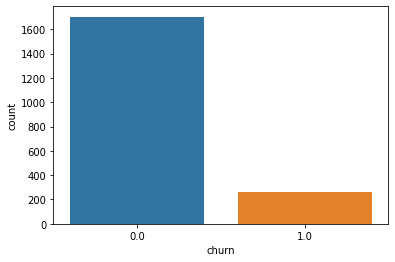

In [25]:
#check label distribution
sns.countplot(df.churn)
df.churn.value_counts()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


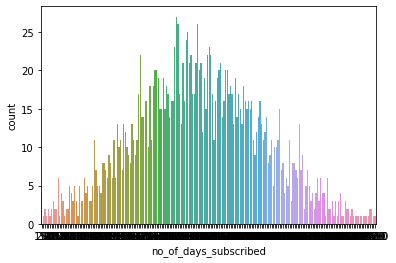

In [10]:
#EDA
sns.countplot(df.no_of_days_subscribed)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


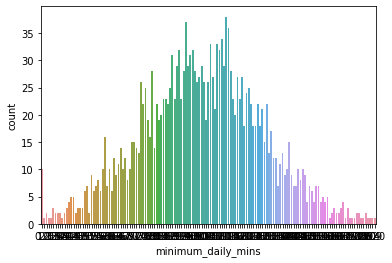

In [11]:
sns.countplot(df.minimum_daily_mins)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


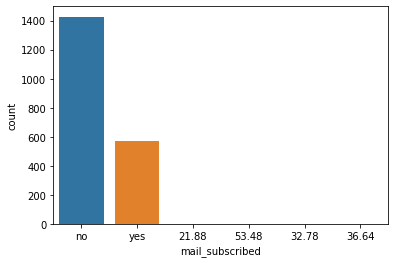

In [12]:
sns.countplot(df.mail_subscribed)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


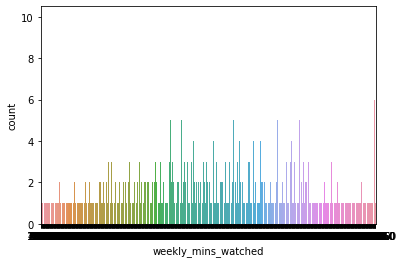

In [13]:
sns.countplot(df.weekly_mins_watched)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


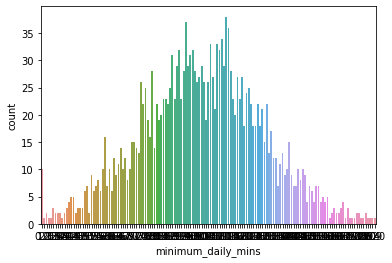

In [ ]:
sns.countplot(df.minimum_daily_mins)

In [37]:
#Columns selection
col = ['gender', 'age', 'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive', 'customer_support_calls', 'churn']
data = df[col].copy()
data.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62.0,no,no,148.35,12.2,16.81,82,1.0,4,1,0.0
1,Female,39,149.0,no,no,294.45,7.7,33.37,87,3.0,3,2,0.0
2,Female,65,126.0,no,no,87.30,11.9,9.89,91,1.0,4,5,1.0
3,Female,24,131.0,no,yes,321.30,9.5,36.41,102,4.0,3,3,0.0
4,Female,40,191.0,no,no,243.00,10.9,27.54,83,7.0,3,1,0.0


In [42]:
data.describe()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
count,2000.00000,1.980000e+03,1.990000e+03,2.000000e+03,2.000000e+03,2.000000e+03,1975.000000,2000.000000,1965.000000
mean,38.69050,-1.695053e-16,6.152951e-17,-1.883042e-16,-6.605827e-18,2.741141e-16,4.488608,1.547000,0.133333
std,10.20641,1.000253e+00,1.000251e+00,1.000250e+00,1.000250e+00,1.000250e+00,2.491067,1.315164,0.340021
min,18.00000,-2.489817e+00,-2.034887e-01,-3.662244e+00,-3.355010e+00,-2.991897e+00,0.000000,0.000000,0.000000
25%,32.00000,-6.769971e-01,-1.052845e-01,-6.458939e-01,-6.448840e-01,-6.871086e-01,3.000000,1.000000,0.000000
50%,37.00000,-2.236777e-02,-8.182423e-02,4.668160e-04,-3.372455e-03,2.993664e-02,4.000000,1.000000,0.000000
75%,44.00000,6.826177e-01,-5.750811e-02,6.468275e-01,6.767612e-01,6.957643e-01,6.000000,2.000000,0.000000
max,82.00000,3.603272e+00,1.232208e+01,3.519542e+00,3.179533e+00,3.820033e+00,19.000000,9.000000,1.000000


In [28]:
data.shape

(2000, 13)

In [43]:
#dropping rows of null values
data.dropna(inplace = True)
data.shape

(1866, 13)

In [44]:
#Data Preproccessing
data['mail_subscribed'] = data['mail_subscribed'].apply(lambda x: '0' if x not in ['no', 'yes'] else x)
data.drop(data[data['mail_subscribed'] == '0'].index, inplace = True)

data.drop(data[data['maximum_days_inactive'] == 'NO'].index[0], inplace = True)


data['maximum_days_inactive'] = data['maximum_days_inactive'].apply(lambda x : int(x))
data['churn'] = data['churn'].apply(lambda x : int(x))

encode_col = ['multi_screen', 'mail_subscribed', 'gender']
encode = LabelEncoder()
for ec in encode_col:
  data[ec] = encode.fit_transform(data[ec])

In [45]:
#Features and variables

X = data.drop(columns = ['churn'])
y = data['churn']

In [46]:
#import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#Counter(y_train)

In [53]:
#model building using XGboost classifier
clf_d = xgboost.XGBClassifier()
clf_d.fit(X_train, y_train)
print(f'Accuracy on Train Data : {clf_d.score(X_train, y_train)}')
print(f'Accuracy on Test Data: {clf_d.score(X_test, y_test)}')
y_pred = clf_d.predict(X_test)
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred))

Accuracy on Train Data : 0.937712895377129
Accuracy on Test Data: 0.7667560321715817
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       313
           1       0.38      0.70      0.49        60

    accuracy                           0.77       373
   macro avg       0.65      0.74      0.67       373
weighted avg       0.84      0.77      0.79       373



,0,1
0,244,69
1,18,42


In [56]:
X.shape

(1861, 12)

In [58]:
#XGBoost
#hyper-parameter Tuning

#Providing a list of values for some xgboost model parameter
params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 2, 3, 5,7, 9],                            
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'n_estimators': [200,400,600,800],
    'scale_pos_weight': [1, 5, 10, 20, 25, 50, 75, 100]
}


model = xgboost.XGBClassifier()                #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(X_train,y_train)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost
clf_d = random_search.best_estimator_

clf_d.fit(X_train, y_train)
print(f'Accuracy on Train Data : {clf_d.score(X_train, y_train)}')
print(f'Accuracy on Test Data: {clf_d.score(X_test, y_test)}')
y_pred = clf_d.predict(X_test)
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy on Train Data : 1.0
Accuracy on Test Data: 0.7533512064343163
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       313
           1       0.38      0.88      0.54        60

    accuracy                           0.75       373
   macro avg       0.68      0.81      0.68       373
weighted avg       0.88      0.75      0.78       373



,0,1
0,228,85
1,7,53


In [55]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.2, max_depth=9, n_estimators=800,
              scale_pos_weight=5)

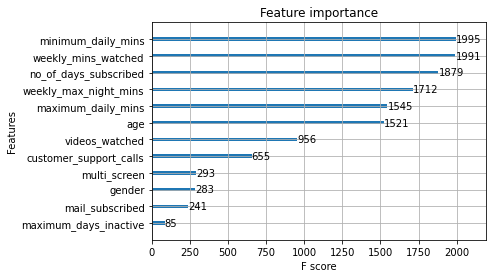

In [ ]:
xgboost.plot_importance(clf_d)
#pyplot.show()

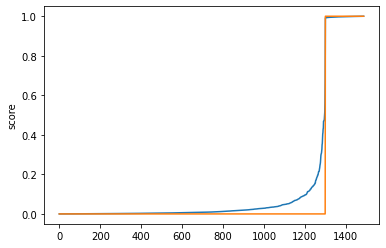

In [ ]:
#model evaluation on train data
y_proba = clf_d.predict_proba(X_train)
prob_bin = [x[1] for x in y_proba]
met = pd.DataFrame([prob_bin, y_train]).transpose()
met.columns = ['score', 'actual']
met.sort_values('score', inplace = True)
met.reset_index(drop = True, inplace = True)
sns.lineplot(x = met.index, y = met['score'])
sns.lineplot(x = met.index, y = met['actual'])

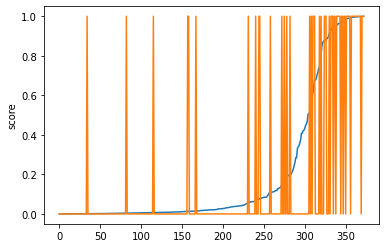

In [ ]:
#model evaluation on test data
y_proba = clf_d.predict_proba(X_test)
prob_bin = [x[1] for x in y_proba]
met = pd.DataFrame([prob_bin, y_test]).transpose()
met.columns = ['score', 'actual']
met.sort_values('score', inplace = True)
met.reset_index(drop = True, inplace = True)
sns.lineplot(x = met.index, y = met['score'])
sns.lineplot(x = met.index, y = met['actual'])